In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matrix Multiplication

In [3]:
A = np.array([[4, 9, 9], [9, 1, 6], [9, 2, 3]])
print(f"Matrix A (3 x 3): \n {A}")

print("\n")

B = np.array([[2, 2], [5, 7], [4, 4]])
print(f"Matrix A (3 x 2): \n {B}")

Matrix A (3 x 3): 
 [[4 9 9]
 [9 1 6]
 [9 2 3]]


Matrix A (3 x 2): 
 [[2 2]
 [5 7]
 [4 4]]


using np.matmul() to multiply the two matrices

In [4]:
AxB = np.matmul(A,B)
print(AxB)

[[ 89 107]
 [ 47  49]
 [ 40  44]]


The python operator @ will also work 

In [5]:
A @ B

array([[ 89, 107],
       [ 47,  49],
       [ 40,  44]])

### Note:
        For matrix multiplication, the number of columns on the first matrix must be equal to the number of rows on the second matrix

In [6]:
try:
    np.matmul(B, A)
except Exception as e:
    print(e)

matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)


In [7]:
try:
    B @ A
except Exception as e:
    print(e)

matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)


In [8]:
x = np.array([1, -2, -5])
y = np.array([4, 3, -1])

print("Shape of vector x:", x.shape)
print("Number of dimensions of vector x:", x.ndim)
print("Shape of vector x, reshaped to a matrix:", x.reshape((3, 1)).shape)
print("Number of dimensions of vector x, reshaped to a matrix:", x.reshape((3, 1)).ndim)

Shape of vector x: (3,)
Number of dimensions of vector x: 1
Shape of vector x, reshaped to a matrix: (3, 1)
Number of dimensions of vector x, reshaped to a matrix: 2


In [9]:
np.matmul(x, y)

np.int64(3)

### Note:
        np.dot() also works for matrix multiplication. What actually happens is called **Broadcasting** in python. Numpy broadcasts the dot product operation to all rows and columns, and you get the resultant product matrix. Broadcasting also works in other operations (+, -, etc)

In [10]:
np.dot(A, B)

array([[ 89, 107],
       [ 47,  49],
       [ 40,  44]])

### LINEAR TRANSFORMATIONS

In [11]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [12]:
import cv2

In [13]:
np.zeros((3, 1))

array([[0.],
       [0.],
       [0.]])

In [14]:
def T(v):
    w = np.zeros((3, 1))
    w[0,0] = 3*v[0,0]
    w[2,0] = -2*v[1,0]
    
    return w

v = np.array([[3], [5]])
w = T(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9.]
 [  0.]
 [-10.]]


A transformation  𝑇
  is said to be linear if the following two properties are true for any scalar  𝑘
 , and any input vectors  𝑢
  and  𝑣
 :

    𝑇(𝑘𝑣)=𝑘𝑇(𝑣)
 
    𝑇(𝑢+𝑣)=𝑇(𝑢)+𝑇(𝑣)


In [15]:
u = np.array([[1], [-2]])
v = np.array([[2], [4]])

k = 7

print(f"T(kv): \n {T(k*v)}, \n k*T(v): \n {k*T(v)}")
print('\n')
print(f"T(u+v): \n {T(u + v)} \n T(u) + T(v): \n {T(u) + T(v)}")

T(kv): 
 [[ 42.]
 [  0.]
 [-56.]], 
 k*T(v): 
 [[ 42.]
 [  0.]
 [-56.]]


T(u+v): 
 [[ 9.]
 [ 0.]
 [-4.]] 
 T(u) + T(v): 
 [[ 9.]
 [ 0.]
 [-4.]]


In [16]:
def L(v):
    A = np.array([[3,0], [0,0], [0,-2]])
    print(f"Transformation of matrix: \n {A} \n")
    w = A @ v

    return w

v = np.array([[3], [5]])
w = L(v)

print(f"Original vector: \n {v}, \n\n Result of the transformation: \n {w}")

Transformation of matrix: 
 [[ 3  0]
 [ 0  0]
 [ 0 -2]] 

Original vector: 
 [[3]
 [5]], 

 Result of the transformation: 
 [[  9]
 [  0]
 [-10]]


### Standard transformations in a plane

In [17]:
img = np.loadtxt('data/image.txt')

In [18]:
print(f"Image Shape: {img.shape}")

Image Shape: (2, 329076)


In [19]:
print(img)

[[ 399.20891527  400.20891527  404.20891527 ...  -88.79108473
   -88.79108473  -88.79108473]
 [ 534.18310664  534.18310664  534.18310664 ... -476.81689336
  -477.81689336 -478.81689336]]


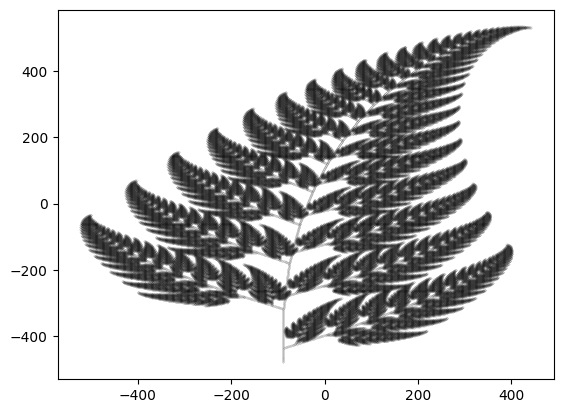

In [23]:
plt.scatter(img[0], img[1], s=0.001, color='black')

### Horizontal Scaling

In [49]:
def T_hscaling(v):
    A = np.array([[2,0], [0,1]])
    w = A @ v
    return w


def transform_vectors(T, v1, v2):
    V = np.hstack((v1, v2))
    W = T(V)
    return W


e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])



transformation_result_hscaling = transform_vectors(T_hscaling, e1, e2)
print("Original vectors:\n e1= \n", e1, "\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_hscaling)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[2 0]
 [0 1]]


Lets visualise how its act on our leaf image

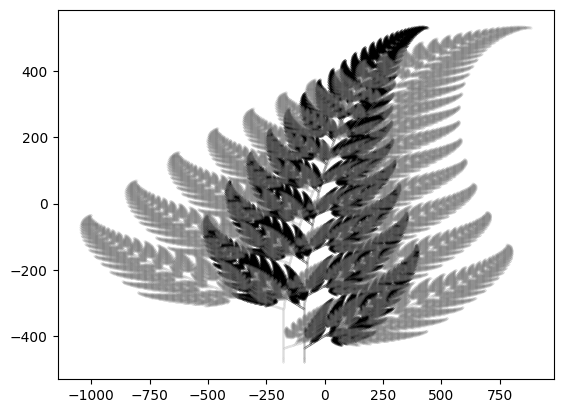

In [50]:
plt.scatter(img[0], img[1], s=0.001, color='black')
plt.scatter(T_hscaling(img)[0], T_hscaling(img)[1], s=0.001, color='grey')

### Reflection about the y-axis (vertical axis)

In [43]:
def T_reflection_yaxis(v):
    A = np.array([[-1,0], [0,1]])
    w = A @ v
    return w


e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_reflection_yaxis = transform_vectors(T_reflection_yaxis, e1, e2)

print("Original vectors:\n e1= \n", e1,"\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_reflection_yaxis)


Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[-1  0]
 [ 0  1]]


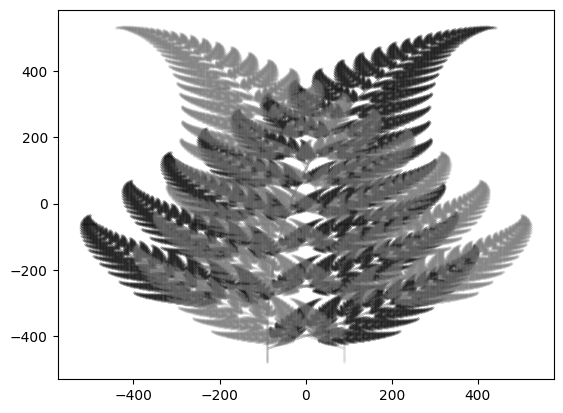

In [44]:
plt.scatter(img[0], img[1], s=0.001, color='black')
plt.scatter(T_reflection_yaxis(img)[0], T_reflection_yaxis(img)[1], s=0.001, color='grey')

### STRETCHING (DILATION)

In [45]:
def T_stretch(a, v):
    T = np.array([[a,0], [0,a]])
    
    # Compute the transformation
    w = T @ v
    ### END CODE HERE ###

    return w

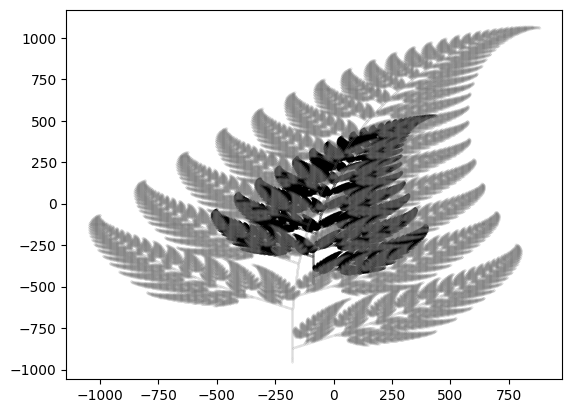

In [46]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_stretch(2,img)[0], T_stretch(2,img)[1], s = 0.001, color = 'grey')